In [7]:
import pandas as pd
import warnings
import re
import numpy as np

# NTLK functions
import nltk
from nltk.corpus import stopwords
from nltk import tokenize as tok
from nltk.stem.snowball import SnowballStemmer # load nltk's SnowballStemmer as variabled 'stemmer'
import string
from nltk.tag import StanfordNERTagger

warnings.simplefilter("ignore", DeprecationWarning)
# Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA
# Tf-Idf and Clustering packages
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [25]:
Restaurant = pd.read_csv("restaurant6.csv")

In [26]:
Restaurant = Restaurant.set_index("Unnamed: 0")

In [27]:
Restaurant.index.rename("index",inplace=True)

In [28]:
Restaurant

,business_id,city,postal_code,stars,review_count,Type,hours_per_week
index,,,,,,,
0,-3AooxIkg38UyUdlz5oXdw,Santa Barbara,93101,3.0,436,Italian,489.3
49,-BdYhP-12elmFV7oB1iv4A,Santa Barbara,93109,5.0,41,American,315.0
98,-nwNPb3G-0L95igrhkvMtw,Santa Barbara,93101,2.5,46,Fast Food,475.3
147,-r6nmLB5Vi2TLQCxh0_dtw,Santa Barbara,93101,4.0,215,Deli,294.0
196,04Ss49U_QKYLotcJMAH8cA,Santa Barbara,93101,4.0,97,Deli,392.0
...,...,...,...,...,...,...,...
21756,z9-8KvMAlVK46De-G3sNJQ,Santa Barbara,93101,4.0,239,Healthy,588.0
21805,zJpZ-uQ_F0XVgK1u98uWSg,Santa Barbara,93101,4.5,13,Mexican,197.4
21854,zZrDoiQIUmiVkifJx0h_KA,Santa Barbara,93101,4.5,8,Coffee,539.0


In [47]:
Review = pd.read_csv("review.csv")

In [48]:
review = Review[Review.business_id.isin(Restaurant.business_id.values)]

In [49]:
data=review[['text']]

In [50]:
review["text"] = review["text"].str.lower()

/Users/eason/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [51]:
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves',"but"]

In [52]:
STOPWORDS = set(stopwordlist)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
review['text'] = review['text'].apply(lambda text: cleaning_stopwords(text))

import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
review['text']= review['text'].apply(lambda x: cleaning_punctuations(x))

def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)
review['text'] = review['text'].apply(lambda x: cleaning_repeating_char(x))

def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
review['text'] = review['text'].apply(lambda x: cleaning_URLs(x))
review['text'].tail()

def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
review['text'] = review['text'].apply(lambda x: cleaning_numbers(x))
review['text'].tail()

/Users/eason/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/eason/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/Users/eason/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

204875    wife didnt know veganvegetarian restaurant per...
204876    sorry person say good paid   chicken wing piec...
204877    amazing dishes  great customer service probabl...
204878    could give  stars would reserved daisy  people...
204880    one favorite restaurants santa barbara reason ...
Name: text, dtype: object

In [53]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer("[\w']+")
review['text'] = review['text'].apply(tokenizer.tokenize)
review['text'].head()

/Users/eason/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


0    [party, hibachi, waitress, brought, separate, ...
1    [yes, sushi, place, town, however, great, your...
3    [great, addition, funk, zone, grab, bite, grab...
6    [visited, disappointed, veggie, pizza, husband...
9    [absolutely, love, everything, tried, here, fa...
Name: text, dtype: object

In [54]:
import nltk
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data
review['text']= review['text'].apply(lambda x: stemming_on_text(x))
review['text'].head()

/Users/eason/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0    [party, hibachi, waitress, brought, separate, ...
1    [yes, sushi, place, town, however, great, your...
3    [great, addition, funk, zone, grab, bite, grab...
6    [visited, disappointed, veggie, pizza, husband...
9    [absolutely, love, everything, tried, here, fa...
Name: text, dtype: object

In [55]:
lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data
review['text'] = review['text'].apply(lambda x: lemmatizer_on_text(x))
review['text'].head()

/Users/eason/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


0    [party, hibachi, waitress, brought, separate, ...
1    [yes, sushi, place, town, however, great, your...
3    [great, addition, funk, zone, grab, bite, grab...
6    [visited, disappointed, veggie, pizza, husband...
9    [absolutely, love, everything, tried, here, fa...
Name: text, dtype: object

In [56]:
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize

In [64]:
from nltk.sentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()
review['polarity'] = review['text'].str.join(" ").apply(lambda x: analyzer.polarity_scores(x))

/Users/eason/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [66]:
review
df = pd.concat(
    [review.drop(['polarity'], axis=1), 
     review['polarity'].apply(pd.Series)], axis=1)

In [68]:
df['sentiment'] = df['compound'].apply(lambda x: 'positive' if x >0 else 'neutral' if x==0 else 'negative')

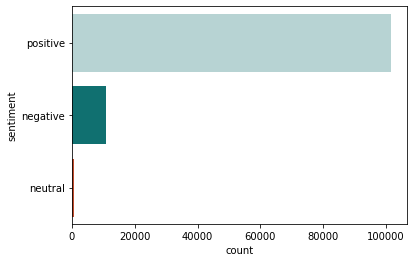

In [70]:
import seaborn as sns
sns.countplot(y='sentiment', 
             data=df, 
             palette=['#b2d8d8',"#008080", '#db3d13']
             );

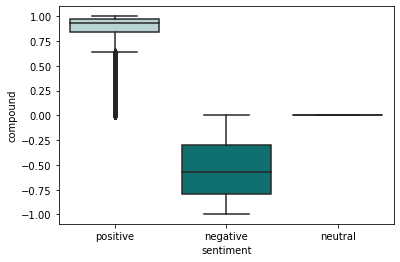

In [71]:
sns.boxplot(y='compound', 
            x='sentiment',
            palette=['#b2d8d8',"#008080", '#db3d13'], 
            data=df);

In [74]:
tokens = word_tokenize(review.text.str())

TypeError: 'StringMethods' object is not callable

In [80]:
text = review.text.str.join(" ")

In [82]:
text = text.str.cat(sep=' ')

In [84]:
tokens = word_tokenize(text)

In [87]:
fdist = FreqDist(tokens)

In [88]:
fdist.most_common()

[('food', 73784),
 ('good', 59157),
 ('place', 56376),
 ('not', 55598),
 ('great', 52084),
 ('service', 39359),
 ('like', 29775),
 ('one', 28620),
 ('back', 28032),
 ('time', 27403),
 ('delicious', 26290),
 ('its', 26131),
 ('get', 25901),
 ('really', 25824),
 ('go', 24006),
 ('would', 23770),
 ('best', 22871),
 ('ordered', 22005),
 ('also', 21900),
 ('order', 21262),
 ('us', 20545),
 ('restaurant', 19831),
 ('got', 19811),
 ('santa', 19379),
 ('amazing', 19001),
 ('it', 18773),
 ('nice', 18262),
 ('barbara', 18077),
 ('love', 17590),
 ('well', 16992),
 ('came', 16779),
 ('no', 16777),
 ('definitely', 16743),
 ('friendly', 16108),
 ('chicken', 16077),
 ('fresh', 15952),
 ('menu', 15813),
 ('dont', 15751),
 ('staff', 15690),
 ('pizza', 15423),
 ('im', 15408),
 ('try', 15323),
 ('even', 15208),
 ('ive', 15183),
 ('little', 15028),
 ('always', 15011),
 ('come', 14738),
 ('tacos', 13752),
 ('made', 12746),
 ('breakfast', 12572),
 ('salad', 12520),
 ('didnt', 12354),
 ('recommend', 12234),


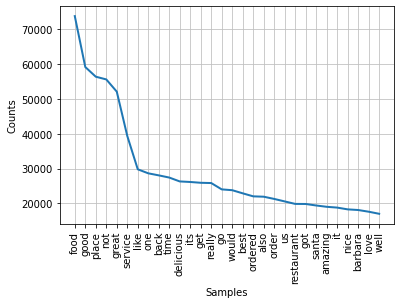

In [91]:
_ = fdist.plot(30)

In [105]:
df_1 = df.groupby("business_id").agg({'compound':"mean"})

In [106]:
df_1

,compound
business_id,
-3AooxIkg38UyUdlz5oXdw,0.497254
-BdYhP-12elmFV7oB1iv4A,0.867768
-nwNPb3G-0L95igrhkvMtw,0.286300
-r6nmLB5Vi2TLQCxh0_dtw,0.712185
04Ss49U_QKYLotcJMAH8cA,0.601213
...,...
z9-8KvMAlVK46De-G3sNJQ,0.680972
zJpZ-uQ_F0XVgK1u98uWSg,0.783400
zZrDoiQIUmiVkifJx0h_KA,0.806787


In [118]:
Restaurant.reset_index(drop=True)

,index,business_id,city,postal_code,stars,review_count,Type,hours_per_week
0,0,-3AooxIkg38UyUdlz5oXdw,Santa Barbara,93101,3.0,436,Italian,489.3
1,49,-BdYhP-12elmFV7oB1iv4A,Santa Barbara,93109,5.0,41,American,315.0
2,98,-nwNPb3G-0L95igrhkvMtw,Santa Barbara,93101,2.5,46,Fast Food,475.3
3,147,-r6nmLB5Vi2TLQCxh0_dtw,Santa Barbara,93101,4.0,215,Deli,294.0
4,196,04Ss49U_QKYLotcJMAH8cA,Santa Barbara,93101,4.0,97,Deli,392.0
...,...,...,...,...,...,...,...,...
444,21756,z9-8KvMAlVK46De-G3sNJQ,Santa Barbara,93101,4.0,239,Healthy,588.0
445,21805,zJpZ-uQ_F0XVgK1u98uWSg,Santa Barbara,93101,4.5,13,Mexican,197.4
446,21854,zZrDoiQIUmiVkifJx0h_KA,Santa Barbara,93101,4.5,8,Coffee,539.0
447,21903,zeAfmYy9b1gfUJLRBHm6vQ,Santa Barbara,93105,4.0,240,Italian,522.2


In [124]:
Restaurant = Restaurant.drop("index",axis=1)

In [129]:
Restaurant["sentiment_socre"] = df_1.compound.values

In [130]:
df_1.compound

business_id
-3AooxIkg38UyUdlz5oXdw    0.497254
-BdYhP-12elmFV7oB1iv4A    0.867768
-nwNPb3G-0L95igrhkvMtw    0.286300
-r6nmLB5Vi2TLQCxh0_dtw    0.712185
04Ss49U_QKYLotcJMAH8cA    0.601213
                            ...   
z9-8KvMAlVK46De-G3sNJQ    0.680972
zJpZ-uQ_F0XVgK1u98uWSg    0.783400
zZrDoiQIUmiVkifJx0h_KA    0.806787
zeAfmYy9b1gfUJLRBHm6vQ    0.691452
ziXR7sUrbKRCNeDqfjibUg    0.596598
Name: compound, Length: 449, dtype: float64

In [133]:
Restaurant
Restaurant['sentiment'] = Restaurant['sentiment_socre'].apply(lambda x: 'positive' if x >0 else 'neutral' if x==0 else 'negative')

In [138]:
Restaurant[Restaurant.sentiment == "negative"]

,business_id,city,postal_code,stars,review_count,Type,hours_per_week,sentiment_socre,sentiment
73,8qGe4GQYyZstFhYa0rvpIg,Goleta,93117,2.0,58,Fast Food,245.0,-0.077561,negative
201,Qsoq2TGOe59LZy7z6KbQjA,Santa Barbara,93103,1.5,56,Pizza,490.7,-0.183114,negative
310,fHUAs1ec568wu-a_mRq7Rw,Santa Barbara,93105,1.5,49,Fast Food,784.0,-0.239621,negative
321,h8DlM-VbvCNzpsTqihgUAw,Santa Barbara,93103,1.5,41,Fast Food,140.0,-0.161467,negative
346,kAGknILVe6xCv9a2uc5JHw,Carpinteria,93013,2.0,25,Fast Food,710.5,-0.120728,negative
368,nqsrL6BuIevb285dbdXjjA,Goleta,93117,2.5,10,Deli,513.1,-0.027410,negative
379,pC0vDDpl_2ue3HGAmGpMSg,Santa Barbara,93103,3.0,5,American,343.0,-0.063940,negative


In [141]:
Restaurant[Restaurant.stars < 3]

,business_id,city,postal_code,stars,review_count,Type,hours_per_week,sentiment_socre,sentiment
2,-nwNPb3G-0L95igrhkvMtw,Santa Barbara,93101,2.5,46,Fast Food,475.3,0.286300,positive
53,5tkZfqkwx6axbN9P5UlC8w,Carpinteria,93013,2.5,32,Fast Food,636.3,0.203915,positive
73,8qGe4GQYyZstFhYa0rvpIg,Goleta,93117,2.0,58,Fast Food,245.0,-0.077561,negative
87,Ak_vHsHsYRP928VHVRL_tQ,Goleta,93117,2.5,76,Fast Food,561.4,0.175200,positive
138,FjVAwrTr0AMfs78pDLamtA,Goleta,93117,2.5,17,Deli,714.0,0.220439,positive
142,Gl3XO4ECKKli8-bKKdkkYA,Santa Barbara,93103,2.0,36,Fast Food,490.0,0.169108,positive
148,HNACff49-kXS7l0MyLOzHw,Santa Barbara,93111,2.5,48,Pizza,483.0,0.201310,positive
159,IZJacI6XEUxy3_wbW76Qfw,Goleta,93117,2.5,188,American,490.0,0.361462,positive
172,LEo6sBsQz3xrpKW-DQjTWQ,Santa Barbara,93106,2.5,18,Fast Food,539.0,0.498344,positive
191,OyFxR5E2HBy-K2-0AxCtFg,Santa Barbara,93109,2.0,42,Pizza,427.0,0.027816,positive


In [142]:
Restaurant.to_csv("Restaurant7.csv")

In [101]:
list(df_1)

[('-3AooxIkg38UyUdlz5oXdw',
         Unnamed: 0               review_id                 user_id  \
  102          3799  28fWpA_2vOy7oRBD5hyfEQ  oX7o1TH0PHUWp9r9ry9_vw   
  222          7419  QhmQu9vULM78rO0dYrTbIw  BwzpY9MiW3AVtyfiVOEQvQ   
  364         11894  yYeMyNOl83QF3LsLpoVXiA  4K8jTRdSscnWfsO5qKmU-Q   
  522         17599  goO4ZgehHwgY6ApfscpoIA  J3d-o-CSeERm_fBWtliXdw   
  713         23702  BF8NjagxIlbs4uIIQ_MNJQ  cfQmrYZYXo9MgMocMvlBxA   
  ...           ...                     ...                     ...   
  19139      710345  5_AnMRZ3X-0fzOiEOMCdyA  hyCDQtwwQAKlZBo5my5-qQ   
  19156      710920  4zcP3DIF6OZqIIJG874aCw  bU2AJyTDaUMY8sWFYAc8pw   
  19188      712247  9ZneWvEKhotzW0qei5861g  VNt7z2FSHyOOrQ8NLaamJQ   
  19205      712865  czRWx3bLpDcj7FjEEaIgjA  qYIdilkSTuRB4oXO_8yoYQ   
  19212      713121  5jPKArQWiqcQzYbdv5p1Lg  I3XHwNgtSsDETkxSpZWLVA   
  
                    business_id  stars  useful  funny  cool  \
  102    -3AooxIkg38UyUdlz5oXdw      4       2      1 

In [ ]:
data.groupby("company").agg('mean')